# Comparsion of Clustering Algorithms for High-Dimensional Data:

In [4]:
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier # assign sample to nearest neighbor
import hdbscan
#import clique

In [5]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import os
os.chdir('../')
from clustering_evaluation import ClusterPurity

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  

In [6]:
#--------- load the dataset ------------#
# -- load the input dataset--#
input_df=pd.read_csv('/home/daikiri/DAIKIRI/src/Hamada/merged.csv', low_memory=False)
input_df.index = 'Event_' + input_df.index.astype(str)
num_rows, num_cols = input_df.shape  # at max num_rows times num_cols columns.
column_names = input_df.columns
    
print ('Input data loaded with shape', input_df.shape) 

# binarize string_labels in ['type']
lb=LabelEncoder()
event_labels=lb.fit_transform(input_df['type'].tolist())
lb.classes_


Input data loaded with shape (2974716, 41)


array(['order', 'stock change'], dtype='<U12')

In [7]:
#-- load the embeddings data --#
embedding_input=pd.read_csv('/home/daikiri/DAIKIRI/src/Hamada/Vectograph_Results/2020-08-08 01:00:07.899851/PYKE_50_embd.csv', index_col=0, low_memory=False)

#consider only events embedding (Event_id)
embedding_index=embedding_input.index.tolist()
prefix = 'Event_'
event_ids=list(filter(lambda x: x.startswith(prefix), embedding_index))
events_df=embedding_input.loc[event_ids]

In [8]:
# split the dataset into train-test split
X_train, X_test, y_train, y_test = train_test_split( events_df.values, event_labels, test_size=0.33, random_state=42)

## Centroid based methods:

### K-Mean:

In [9]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(events_df.values)
y_predicted=kmeans.predict(events_df.values)

In [10]:
#------------- Evaluation based on cluster_purity metric: -----------------#
evaluator=ClusterPurity()
purity_score=evaluator.purity_score(y_true=event_labels, y_pred=y_predicted)
print('Clustering Purity Score: ', purity_score)

#----------- Evaluation based on Precision, Recall, Accuracy and F1-score: -------#
accuracy = accuracy_score(event_labels, y_predicted)
print('Accuracy: %f' % accuracy)

precision = precision_score(event_labels, y_predicted)
print('Precision: %f' % precision)

recall = recall_score(event_labels, y_predicted)
print('Recall: %f' % recall)

f1 = f1_score(event_labels, y_predicted)
print('F1 score: %f' % f1)

Clustering Purity Score:  0.9760810779919831
Accuracy: 0.024060
Precision: 0.995294
Recall: 0.000146
F1 score: 0.000291


[Text(0, 0.5, 'order'), Text(0, 1.5, 'stock change')]

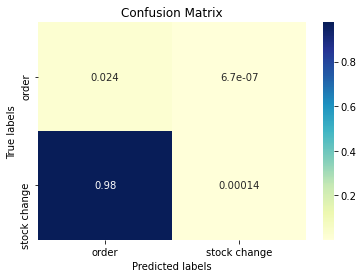

In [14]:
#------------- Confusion Matrix ------------------#
labels=[0, 1]
cm= confusion_matrix(event_labels, y_predicted, labels, normalize='all')
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# # labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['order', 'stock change'])
ax.yaxis.set_ticklabels(['order', 'stock change'])

## Density-based Methods:

### HDBSCAN:

In [ ]:
##-- Cluster the data using HDBSCAN --### -- Consider Hyperparameter tuning later --#
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.3, approx_min_span_tree=True, metric='euclidean',
                            gen_min_span_tree=True, min_cluster_size=10000, min_samples=100, cluster_selection_epsilon= 0.5, 
                            core_dist_n_jobs=1,allow_single_cluster=False).fit(events_df)

In [16]:
y_predicted = clusterer.labels_

In [18]:
#------------- Evaluation based on cluster_purity metric: -----------------#
purity_score=evaluator.purity_score(y_true=event_labels, y_pred=y_predicted)
print('Clustering Purity Score: ', purity_score)

#----------- Evaluation based on Precision, Recall, Accuracy and F1-score: -------#
accuracy = accuracy_score(event_labels, y_predicted)
print('Accuracy: %f' % accuracy)

precision = precision_score(event_labels, y_predicted, average='macro')
print('Precision: %f' % precision)

recall = recall_score(event_labels, y_predicted, average='macro')
print('Recall: %f' % recall)

f1 = f1_score(event_labels, y_predicted, average='macro')
print('F1 score: %f' % f1)

Clustering Purity Score:  0.9760810779919831
Accuracy: 0.936376
Precision: 0.326482


/home/daikiri/.conda/envs/daikiri/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.321963
F1 score: 0.324100


/home/daikiri/.conda/envs/daikiri/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Text(0, 0.5, 'order'), Text(0, 1.5, 'stock change')]

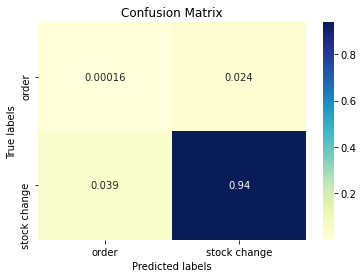

In [19]:
#------------- Confusion Matrix ------------------#
labels=[0, 1]
cm= confusion_matrix(event_labels, y_predicted, labels, normalize='all')
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu"); #annot=True to annotate cells

# # labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['order', 'stock change'])
ax.yaxis.set_ticklabels(['order', 'stock change'])

### Optics:

In [20]:
from sklearn.cluster import OPTICS

In [ ]:
optics_clusterer = OPTICS(min_samples=100).fit(events_df)

In [ ]:
print (len(optics_clusterer))

## Subspace clustering:

## Graph-based Clustering:

### Spectral:

### CLIQUE: https://github.com/georgekatona/Clique

## Grid-Based Clustering Algorithms: 

# Other Resources:

https://elki-project.github.io/howto/clustering

https://en.wikipedia.org/wiki/Cluster_analysis 